In [116]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pywt

In [117]:
img = cv2.imread('cameraman.png', 0)

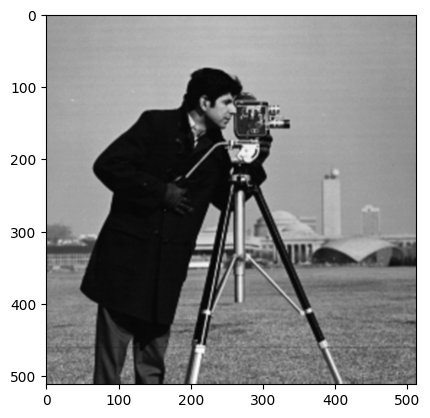

In [118]:
#show the image
plt.imshow(img, cmap='gray', interpolation='bicubic')

In [119]:
#show the matrix image and its size
print(img.shape)
print(img)
print(img.max())
print(img.min())

(512, 512)
[[157 157 159 ... 151 151 151]
 [155 157 157 ... 151 151 151]
 [157 157 155 ... 153 151 151]
 ...
 [122 120 126 ... 122 114 110]
 [120 120 129 ... 124 114 108]
 [124 120 126 ... 120 112 112]]
255
0


In [120]:
# calculate moments
from sympy import symbols, Eq, solve

def findMoments (img):

    _, img = cv2.threshold(img, 100, 252, cv2.THRESH_BINARY)  #this step can be optional as well. i dont know if this is even neccessary
    moment = cv2.moments(img)

    #create a dictionary to store the information
    variables_dict = {}
    t_alpha = int(moment['m10']/moment['m00'])
    t_beta = int(moment['m01']/moment['m00'])
    mu_03 = moment['mu03']
    mu_12 = moment['mu12']
    mu_21 = moment['mu21']
    mu_30 = moment['mu30']
    mu_11 = moment['mu11']
    mu_20 = moment['mu20']

    b = symbols('b')
    coeff = [mu_03, 3*mu_12, 3*mu_21, mu_30]
    # equation = Eq((b**3)*mu_03 + 3*(b**2)*mu_12 + 3*b*mu_21 + mu_30, 0)
    # betas = solve(equation, b)

    betas = np.roots(coeff)

    betas_real = []
    for i in range(len(betas)):
        if np.isreal(betas[i]):
            betas_real.append(betas[i])

    #take the median of betas_real
    beta = betas_real[0]

    beta = np.real(beta)

    lambda_ = mu_11/mu_20

    variables_dict['t_alpha'] = t_alpha
    variables_dict['t_beta'] = t_beta
    variables_dict['beta'] = beta
    variables_dict['lambda'] = lambda_

    return variables_dict


In [121]:
findMoments(img)

{'t_alpha': 279,
 't_beta': 235,
 'beta': 1.7178507080174241,
 'lambda': 0.07295653494397585}

In [122]:
def translate (img, variables_dict):

    t_alpha = variables_dict['t_alpha']
    t_beta = variables_dict['t_beta']

    rows, cols = img.shape
    M = np.float32([[1, 0, t_alpha], [0, 1, t_beta]])
    img_translated = cv2.warpAffine(img, M, (cols, rows))

    return img_translated

In [123]:
def shear(img, variables_dict, direction):

    beta = variables_dict['beta']
    lambda_ = variables_dict['lambda']

    rows, cols = img.shape

    if direction == 'x':
        M = np.float32([[1, beta, 0], [0, 1, 0]])
    elif direction == 'y':
        M = np.float32([[1, 0, 0], [lambda_, 1, 0]])

    img_sheared = cv2.warpAffine(img, M, (cols, rows))

    return img_sheared

In [124]:
def scale(img, variables_dict, alpha, delta):

    #scale by alpha in x direction and delta in y direction
    rows, cols = img.shape
    M = np.float32([[alpha, 0, 0], [0, delta, 0]])
    img_scaled = cv2.warpAffine(img, M, (cols, rows))

    return img_scaled

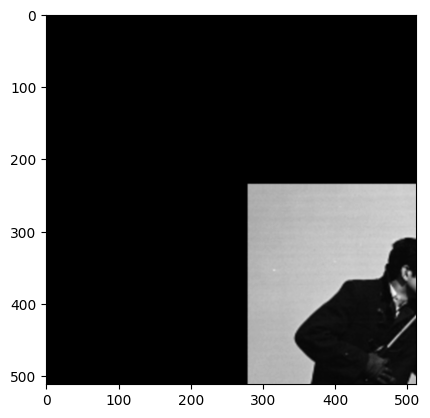

In [125]:
variables_dict = findMoments(img)
img_translated = translate(img, variables_dict)
img_sheared_x = shear(img, variables_dict, 'x')
img_sheared_y = shear(img, variables_dict, 'y')
img_scaled = scale(img, variables_dict, 1.5, 1.5)

plt.imshow(img_translated, cmap='gray', interpolation='bicubic')

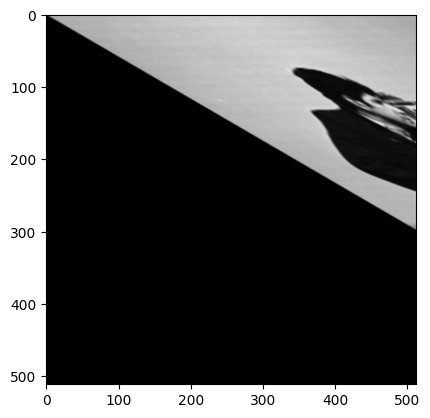

In [126]:
plt.imshow(img_sheared_x, cmap='gray', interpolation='bicubic')

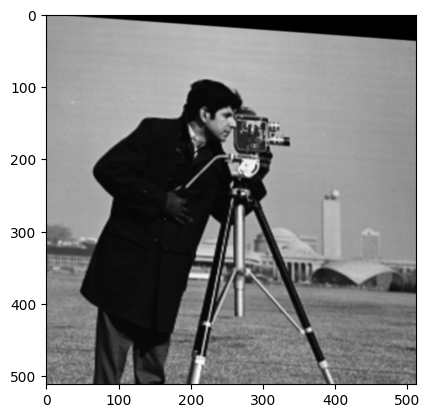

In [127]:
plt.imshow(img_sheared_y, cmap='gray', interpolation='bicubic')

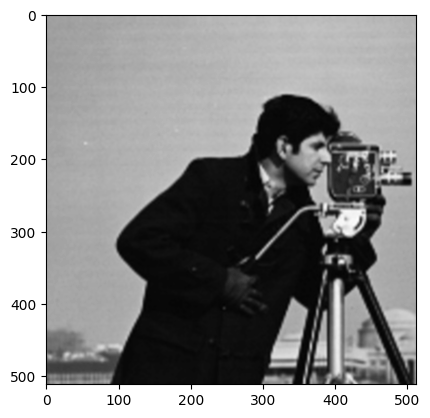

In [128]:
plt.imshow(img_scaled, cmap='gray', interpolation='bicubic')

In [129]:
img2 = cv2.imread('star.png', 0)

In [130]:
def normalisation(img):

    variables_dict = findMoments(img)
    img_translated = translate(img, variables_dict)
    #plt.imshow(img_translated, cmap='gray', interpolation='bicubic')
    img_sheared_x = shear(img_translated, variables_dict, 'x')
    #plt.imshow(img_sheared_x, cmap='gray', interpolation='bicubic')
    img_sheared_y = shear(img_sheared_x, variables_dict, 'y')
    #plt.imshow(img_sheared_y, cmap='gray', interpolation='bicubic')
    img_scaled = scale(img_sheared_y, variables_dict, 0.05, 0.05)
    #plt.imshow(img_scaled, cmap='gray', interpolation='bicubic')

    return img_scaled

(512, 512)
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


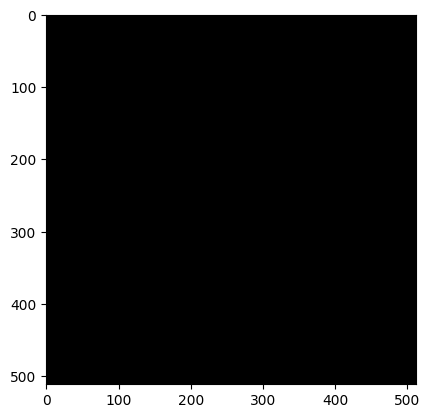

In [131]:
img_normalised = normalisation(img)
plt.imshow(img_normalised, cmap='gray', interpolation='bicubic')

print(img_normalised.shape)
print(img_normalised)